# Synthetic data test
Perform test to create 2-photon-like synthetic data.
Steps:
  1. Add neurons (<=> gaussians)
  2. Deform image (warping, different shapes, translation, etc.)
  3. Add noise (poisson noise)

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
shape = (192, 256)

# Single step test
Neurons

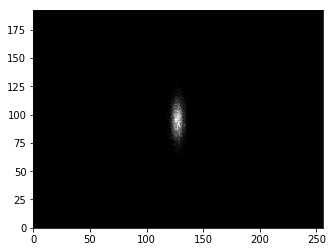

In [40]:
mean = [shape[1]/2, shape[0]/2]
cov = [[10, 0],
       [0, 100]]

bkg = np.zeros(shape, dtype=np.float32)

x, y = np.random.multivariate_normal(mean, cov, 10000).T
hist = plt.hist2d(x, y, bins=[shape[1], shape[0]], range=[[0, shape[1]], [0, shape[0]]])

neurons = hist[0].T / hist[0].max()
plt.imshow(bkg + neurons, cmap='gray')
plt.show()

Deformations

Noise

**Current problem: too few values for the pixels because of how poisson noise works**

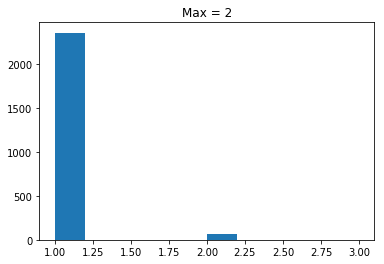

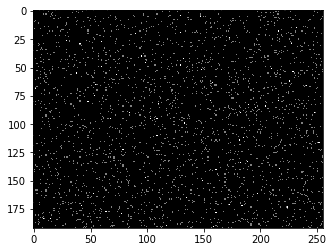

In [73]:
bkg = np.zeros(shape, dtype=np.float32)

noise = np.random.poisson(lam=0.05, size=shape)
# noise = noise / noise.max()

plt.hist(noise.ravel(), align="mid", range=[1, noise.max() + 1])
plt.title("Max = %d" % noise.max())
plt.show()

plt.imshow(bkg + noise, cmap='gray')
plt.show()